In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Set the working directory for the assignment
import os
SKELETON_DIR ='/content/drive/MyDrive/Uni/CSE5DL/Assignnment/'
os.chdir(SKELETON_DIR)
! mkdir -p "$SKELETON_DIR/saved_models"
! mkdir -p "$SKELETON_DIR/logs"
# Set up auto-reloading modules from the working directory
%load_ext autoreload
%autoreload 2

# Install extra dependencies
!pip install -q transformers==4.27.0
# !pip install -q wandb==0.10.8
!pip install -q wandb==0.15.0
!pip install -q torchmetrics==0.11.3


# Set the default figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 kB 31.0 MB/s eta 0:00:00


In [ ]:
%%shell
try:
  DATA_URL='1Z8Sg1a3T1HTJDmsM5Q_SaVslKkH3U3An'
except:
  DATA_URL='https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1'

#pip install --upgrade --no-cache-dir gdown
# pushd /content
# gdown  $DATA_URL
# unzip -q data.zip
# popd


pushd /content
wget -O data.zip $DATA_URL
unzip -q data.zip
popd

/bin/bash: try:: command not found
/bin/bash: line 2: except:: command not found
/content /content/drive/MyDrive/Uni/CSE5DL/Assignnment
--2023-05-25 09:13:54--  https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1
Resolving latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1 [following]
--2023-05-25 09:13:55--  https://latrobeuni-my.sharepoint.com/personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1
Reusing existing connection to latrobeuni-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1043211099 (995M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[=

Image Classification



In this first task, create a deep learning model to classify images of skin lesions into one of seven classes:

1.   "MEL" = Melanoma
2.   "NV" = Melanocytic nevus
3.   "BCC" = Basal cell carcinoma
4.   "AKIEC" = Actinic keratosis
5.   "BKL" = Benign keratosis
6.   "DF" = Dermatofibroma
7.   "VASC" = Vascular lesion

The data for this task is a subset of: https://challenge2018.isic-archive.com/task3/

The data for this task is inside the `/content/data/img` folder. It contains ~3,800 images named like `ISIC_000000.jpg` and the following label files:

*   `/content/data/img/train.csv`
*   `/content/data/img/val.csv`
*   `/content/data/img/train_small.csv`
*   `/content/data/img/val_small.csv`

The `small` versions are the first 200 lines of each partition and are included for debugging purposes. To save time, ensure your code runs on the `small` versions first.



## Explore the training set

Checking data issues,checked the class distribution and at least 1 other potential data issue.

In [ ]:
import pandas as pd

IMG_CLASS_NAMES = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]

train_df = pd.read_csv('/content/data/img/train.csv')
val_df = pd.read_csv('/content/data/img/val.csv')
train_df["image"]

0       ISIC_0024306
1       ISIC_0024307
2       ISIC_0024308
3       ISIC_0024309
4       ISIC_0024310
            ...     
2999    ISIC_0027305
3000    ISIC_0027306
3001    ISIC_0027307
3002    ISIC_0027308
3003    ISIC_0027309
Name: image, Length: 3004, dtype: object

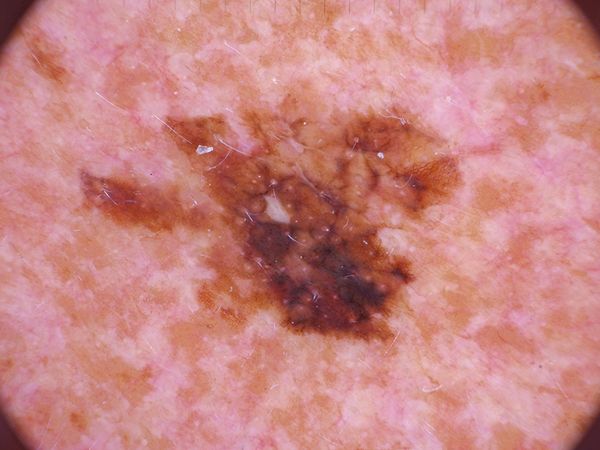

In [ ]:
from PIL import Image
# Change the filename to view other examples from the dataset
display(Image.open('/content/data/img/ISIC_0024310.jpg'))

[[0.0 1.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0]]
[1 1 1 1 0]


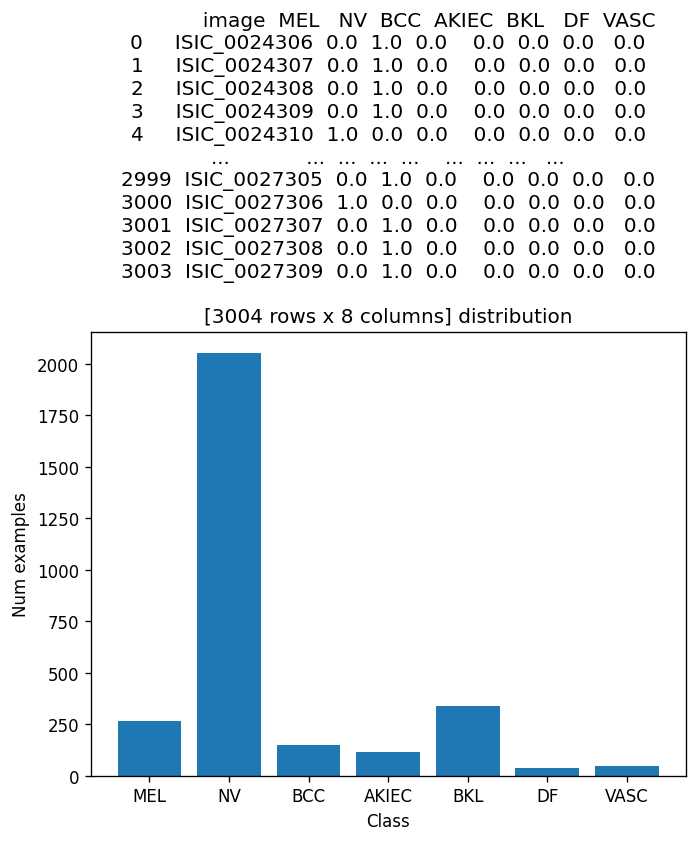

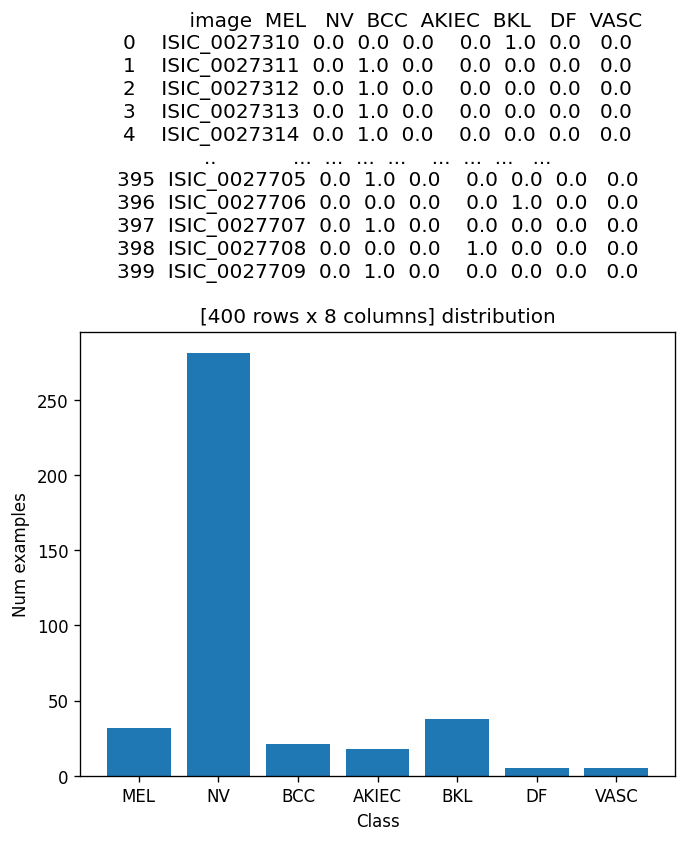

In [ ]:
import explore

#Check for data issues
train_labels = train_df.iloc[:,1:].values.argmax(axis=1)
val_labels = val_df.iloc[:,1:].values.argmax(axis=1)
# it matches the contents of train.csv
print(train_df.values[:5,1:])
print(train_labels[:5])


# Plot the class distributions like the following:
explore.plot_label_distribution(train_labels,train_df,IMG_CLASS_NAMES)
explore.plot_label_distribution(val_labels,val_df,IMG_CLASS_NAMES)


## Implementing Training loop

*   Implemented  LesionDataset in `datasets.py`. Use the cell below to test your implementation.
*   Implemented the incomplete functions in `train.py`

In [ ]:
import datasets
ds = datasets.LesionDataset('/content/data/img','/content/data/img/train.csv',augment=False)
input,labels=ds[0]

##Implementing  a baseline convolutional neural network

Implementing a baseline convolutional neural network which you can compare results to. This allows us to evaluate any improvements made by hyperparameter tuning or transfer learning.

<a name="task-1-model-training"></a>
## Model Training Cell

We will be using Weights and Biases to keep track of our experimental runs and evaluation metrics. Please see lab 6 to learn how to use Weights and Biases.


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import numpy as np


import datasets
import models
import train

torch.manual_seed(42)
NUM_EPOCHS = 5
BATCH_SIZE = 64


# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
# TODO Task 1d - Account for data issues, if applicable
train_dataset = datasets.LesionDataset('/content/data/img','/content/data/img/train.csv',augment=False)
val_dataset= datasets.LesionDataset('/content/data/img','/content/data/img/val.csv')

label_df=pd.DataFrame({"labels":train_dataset.labels})
train_weights= list(1-pd.DataFrame(train_dataset.labels).value_counts()/pd.DataFrame(train_dataset.labels).value_counts().sum())
label_weights=pd.DataFrame(label_df.value_counts()).reset_index()
label_weights.rename(columns={0:"label_counts"},inplace=True)
label_weights["label_counts"]=label_weights["label_counts"].apply(lambda x:1-(x/len(train_dataset.labels)))
keys=label_weights["labels"].tolist()
values=label_weights["label_counts"].tolist()
key_dict={keys[i]:values[i] for i in range(len(keys))}
weights=[key_dict[train_dataset.labels[i]] for i in range(len(train_dataset.labels))]


train_sampler = WeightedRandomSampler(weights,len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE,sampler=train_sampler)
train_loader_shuffle = DataLoader(train_dataset, batch_size=BATCH_SIZE,shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model, specifiy the optimizer and criterion you want to use
# TODO Task 1d - Account for data issues, if applicable
model = models.SimpleBNConv(input.size(0),len(IMG_CLASS_NAMES))


optimizer =torch.optim.Adam(model.parameters(), lr=0.0001)
criterion =nn.CrossEntropyLoss()

# # Train model
# # TODO Task 1c: Set ident_str to a string that identifies this particular
# #               training run. Note this line in the training code
# #                     exp_name = f"{model.__class__.__name__}_{ident_str}"
# #               So it means the the model class name is already included in the
# #               exp_name string. You can consider adding other information
# #               particular to this training run, e.g. learning rate (lr) used,
# #               augmentation (aug) used or not, etc.

train.train_model(model, train_loader_shuffle, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
                  ident_str="25_05_23")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy_train,▁▄▆▇█
Accuracy_val,▇█▁▅▃
Loss_train,█▄▃▂▁
Loss_val,█▁▂▁▂
UAR_train,▁▄▆▇█
UAR_val,▁▅██▇
Accuracy_train,0.74634
Accuracy_val,0.68
Loss_train,0.70181
Loss_val,0.92453
UAR_train,0.40585


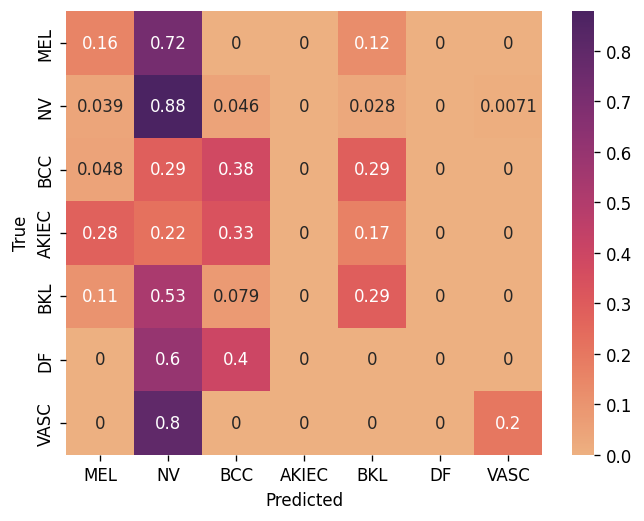

In [ ]:
torch.manual_seed(42)
NUM_EPOCHS = 5
BATCH_SIZE = 64
train_dataset=datasets.LesionDataset('/content/data/img','/content/data/img/train.csv',fivecrops=True)
val_dataset= datasets.LesionDataset('/content/data/img','/content/data/img/val.csv',fivecrops=True)
train_loader=DataLoader(train_dataset,batch_size=BATCH_SIZE)
train_loader_sampler = DataLoader(train_dataset, batch_size=BATCH_SIZE,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=BATCH_SIZE)

fivecropmodel = models.FiveCropSimpleBNConv(3,7)
optimizer =torch.optim.Adam(fivecropmodel.parameters(), lr=0.001)
criterion =nn.CrossEntropyLoss()
train.train_model(fivecropmodel, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
                  ident_str="FiveCropCNNDEMOTRY")